In [165]:
# The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
# There are 50000 training images and 10000 test images

from keras.datasets import cifar10

In [166]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [167]:
x_train.shape

(50000, 32, 32, 3)

In [169]:
x_train[0].shape

(32, 32, 3)

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

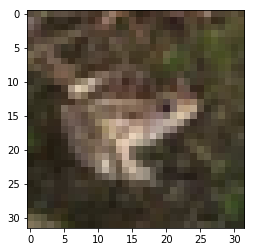

In [172]:
plt.imshow(x_train[22])

In [173]:
x_test.max()

255

In [174]:
# Normalize the train and test image data
x_train = x_train/255
x_test = x_test/255

In [175]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [90]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [91]:
# Image classes in the output
dict_index_label = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

In [92]:
dict_index_label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

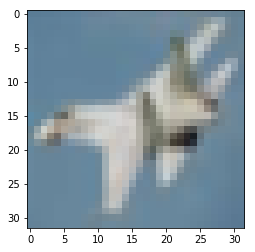

In [177]:
plt.imshow(x_test[10])

In [178]:
x_test[10].shape

(32, 32, 3)

In [179]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [180]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [132]:
# Build the model with CNN

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(4,4), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               590080    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
__________

In [133]:
# Use Early Stopping to avoid over-fitting

from keras.callbacks import EarlyStopping

In [134]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [135]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=[x_test, y_cat_test], verbose=1, callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5587 - acc: 0.4336 - val_loss: 1.2838 - val_acc: 0.5407
Epoch 2/15
50000/50000 [==============================] - 64s 1ms/step - loss: 1.2183 - acc: 0.5713 - val_loss: 1.1597 - val_acc: 0.5896
Epoch 3/15
50000/50000 [==============================] - 64s 1ms/step - loss: 1.0806 - acc: 0.6210 - val_loss: 1.0396 - val_acc: 0.6406
Epoch 4/15
50000/50000 [==============================] - 67s 1ms/step - loss: 0.9810 - acc: 0.6579 - val_loss: 0.9766 - val_acc: 0.6579
Epoch 5/15
50000/50000 [==============================] - 67s 1ms/step - loss: 0.9078 - acc: 0.6777 - val_loss: 1.0448 - val_acc: 0.6372
Epoch 6/15
50000/50000 [==============================] - 66s 1ms/step - loss: 0.8453 - acc: 0.7025 - val_loss: 0.9248 - val_acc: 0.6795
Epoch 7/15
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7810 - acc: 0.7239 - val_loss: 0.9155 - val_acc

In [138]:
model.evaluate(x_test, y_cat_test)

10000/10000 [==============================] - 4s 422us/step


[0.9633160497665405, 0.6944]

In [139]:
from sklearn.metrics import classification_report

In [140]:
predictions = model.predict_classes(x_test)

In [141]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.75      0.74      0.75      1000
          1       0.86      0.81      0.83      1000
          2       0.62      0.50      0.55      1000
          3       0.49      0.48      0.49      1000
          4       0.57      0.71      0.63      1000
          5       0.58      0.61      0.59      1000
          6       0.72      0.82      0.76      1000
          7       0.80      0.69      0.74      1000
          8       0.80      0.79      0.79      1000
          9       0.80      0.80      0.80      1000

avg / total       0.70      0.69      0.69     10000



In [142]:
model.metrics_names

['loss', 'acc']

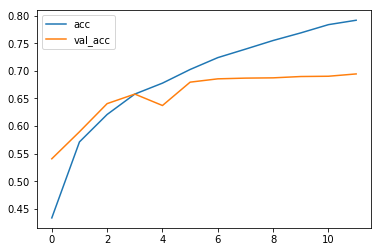

In [143]:
plt.plot(model.history.history['acc'], label='acc')
plt.plot(model.history.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

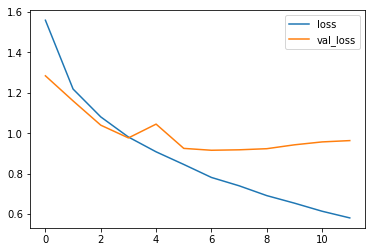

In [144]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [145]:
predictions

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [147]:
# Evaluation of results for a single image from the testset
x_test.shape

(10000, 32, 32, 3)

In [156]:
x_test[3000].shape

(32, 32, 3)

In [157]:
x_single_img = x_test[3000].reshape(1, 32, 32, 3)

In [158]:
x_single_img.shape

(1, 32, 32, 3)

In [159]:
single_prediction = model.predict_classes(x_single_img)

In [160]:
#Predicted class
single_prediction

array([5], dtype=int64)

In [161]:
#Actual Class
y_test[3000]

array([5])

In [162]:
# Object is a dog
dict_index_label[5]

'dog'

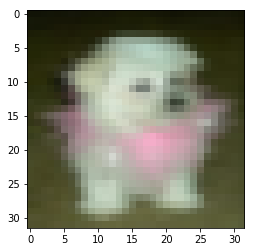

In [164]:
plt.imshow(x_test[3000])